<a href="https://colab.research.google.com/github/jh0n3/at01/blob/master/Jhonathan_at03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Dados de Árvores emergentes na Amazônia Brasileira**

* Dataset contendo atributos oriundos de um Modelo Digital de Terreno (MDT) bem como a localização de árvores que se elevam além do dossel florestal, ditas árvores emergentes, na Amazônia brasileira.
* Os atributos topográficos (numéricos) são:
 * Elevação (altitude) - DTM
 * Indice Topográfico de Umidade - TWI
 * Declividade - SLP
 * Aspecto (azimute da declividade) - ASP
 * Distância horizontal até o corpo dágua mais próximo - HDI
 * Distância vartical até o corpo dágua mais próximo - VDI
 * Índice de Roustez Topográfica - RGX
 * Índice de Posição Topográfica - TPI
 * Índice de Convergência Topográfica - TCI
 * Direção de Fluxo de água - DIR
 * Índice de Rugosidade Topográfica - TRI
* 632 instâncias

* O dataset está balanceado, pois existem 50% de ocorrenica de Arvores Emergentes (AE) e 50% de Arvores nãop Emergentes (ANE)

**Montando o ambiente no Google Drive**


In [1]:
from google.colab import drive
drive.mount('/content/drive/', force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


## 1. Importar bibliotecas necessárias

In [2]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

## 2. Lendo os dados

In [3]:
# lendo csv e armazenando em um dataframe
dados = pd.read_csv('/content/drive/My Drive/ML_jh0n3/emergentesP50_corrClean.csv')
dados.head()

,EMERGENTE,DTM,TWI,SLP,ASP,HDI,VDI,TPI,TCI
0,0,52.877316,5.646127,1.115717,225.000000,268.882263,0.858570,-0.005764,8.405160
1,0,76.121002,0.458159,13.319283,196.762161,250.362488,27.497246,0.408562,-0.427912
2,0,62.663570,5.795762,2.120610,208.456863,409.534058,3.184376,-0.008343,3.405835
3,0,66.057808,2.950522,32.357330,327.166534,304.391907,16.927715,0.187172,2.162333
4,0,69.429962,4.540288,24.646606,143.793945,99.468040,19.007271,-0.007156,3.556503


## 3. Limpeza e organização dos dados

In [4]:
#verificar se existem valores NAN, ? ou dados faltantes
dados = dados.dropna()

In [5]:
#excluir colunas irrelevantes
#dados = dados.drop(columns=['RDM','RGX','DIR, 'TRI'])
#dados.head()

## 4. Reescalonamento dos dados

In [6]:
dados = (dados - dados.min())/(dados.max()-dados.min())
dados.head()

,EMERGENTE,DTM,TWI,SLP,ASP,HDI,VDI,TPI,TCI
0,0.0,0.091426,0.508997,0.020933,0.633415,0.258782,0.015793,0.398346,0.716769
1,0.0,0.494000,0.022587,0.249899,0.553921,0.240769,0.518095,1.000000,0.059528
2,0.0,0.260921,0.523027,0.039787,0.586843,0.395590,0.059649,0.394601,0.344785
3,0.0,0.319708,0.256264,0.607093,0.921032,0.293321,0.318795,0.678514,0.252260
4,0.0,0.378113,0.405317,0.462424,0.404806,0.093998,0.358007,0.396324,0.355996


## 5. Organizando dados para modelagem

### Dividir os dados em atributos descritores e atributo de classe (target)

In [7]:
#dividindo dados em atributos descritores e atributo de classe
X = dados.iloc[:,1:]
X.head()

,DTM,TWI,SLP,ASP,HDI,VDI,TPI,TCI
0,0.091426,0.508997,0.020933,0.633415,0.258782,0.015793,0.398346,0.716769
1,0.494000,0.022587,0.249899,0.553921,0.240769,0.518095,1.000000,0.059528
2,0.260921,0.523027,0.039787,0.586843,0.395590,0.059649,0.394601,0.344785
3,0.319708,0.256264,0.607093,0.921032,0.293321,0.318795,0.678514,0.252260
4,0.378113,0.405317,0.462424,0.404806,0.093998,0.358007,0.396324,0.355996


In [8]:
y = dados.EMERGENTE
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: EMERGENTE, dtype: float64

### Dividir os dados em treino e teste

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [11]:
X_train.head()

,DTM,TWI,SLP,ASP,HDI,VDI,TPI,TCI
6,0.957024,0.366936,0.014473,0.412717,1.000000,0.692389,0.411713,0.074315
104,0.370007,0.340751,0.216376,0.473671,0.166960,0.407311,0.372859,0.216018
114,0.987404,0.380633,0.024196,0.482971,0.672969,0.530025,0.429804,0.257896
493,0.496951,0.505619,0.378548,0.352265,0.344246,0.447013,0.095034,0.819955
414,0.491617,0.365815,0.196821,0.420027,0.252705,0.070667,0.400744,0.351838


In [12]:
y_train.head()

6      0.0
104    0.0
114    0.0
493    1.0
414    1.0
Name: EMERGENTE, dtype: float64

## 6. Definindo o algoritmo de aprendizagem (MLP)

In [13]:
from sklearn.neural_network import MLPClassifier

In [14]:
#definindo modelo
classificador = MLPClassifier(hidden_layer_sizes=(100),activation='logistic',max_iter=1000)

In [15]:
#treinando modelo
classificador.fit(X_train,y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=100, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [34]:
#realizando classificação
classificacao = classificador.predict(X_test)
classificacao

array([0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 1.])

## Comentários:


## 7. Avaliação do classificador

In [35]:
#calculando acurácia
from sklearn.metrics import accuracy_score

In [36]:
acuracia = accuracy_score(y_test,classificacao)
round(acuracia,3)

0.638

In [37]:
#calculando precisão
from sklearn.metrics import precision_score

In [38]:
precisao = precision_score(y_test,classificacao)
round(precisao,3)

0.567

In [21]:
#calculando recall (revocação)
from sklearn.metrics import recall_score

In [39]:
recall = recall_score(y_test,classificacao)
round(recall,3)

0.63

In [40]:
#calculando f1-score
from sklearn.metrics import f1_score

In [41]:
f1 = f1_score(y_test,classificacao)
round(f1,3)

0.596

In [42]:
#plotando curva roc
from sklearn.metrics  import roc_curve

In [43]:
fpr, tpr, _ = roc_curve(y_test,classificacao)

In [46]:
fpr

array([0.        , 0.35616438, 1.        ])

In [47]:
tpr

array([0.        , 0.62962963, 1.        ])

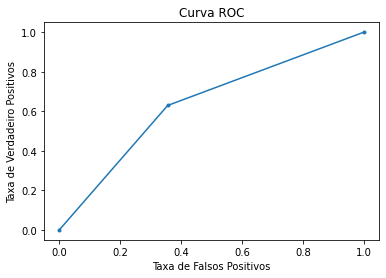

In [48]:
plt.plot(fpr,tpr,marker='.')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()

## Área sob a curva (*Area under the curve - AUC)*

In [49]:
#calculando area sob a curva ROC
from sklearn.metrics import roc_auc_score

In [51]:
auc = roc_auc_score(y_test,classificacao)
round(auc,3)

0.637

## **Comentários**: 
## **Comentários:**
Os resutados das méticas acurácia, precvisão, recall, f1 foram, respectivamente, 63.8%, 56.7%, 63%, 59.65%. Esses resultados foram ligeiramente superiores aos métodos anteriores (Arvore de desição e Floresta aleatoria) 61.4%, 54.4%, 57.4%, 63.7%. O mesmo acontece como AUC (RNA = 63.7% ; RF = 60.9%)
Embora os scores obtidos pela RNA tenha sido superiores, nesse caso, à RF, os atributos parecem ser pouco significativos na caracterização do ambiente favorável à incidência de arvores emergentes.

## Validação Cruzada

In [55]:
# avaliando modelo com cross validation
from sklearn.model_selection import cross_val_score

In [56]:
#define modelo
classificador = MLPClassifier(hidden_layer_sizes=(100),activation='logistic',max_iter=1000)

In [57]:
#calculando os scores
scores = cross_val_score(classificador,X,y,cv=10)
scores

array([0.515625  , 0.5       , 0.71428571, 0.66666667, 0.73015873,
       0.49206349, 0.58730159, 0.65079365, 0.71428571, 0.55555556])

In [58]:
round(scores.mean(),3),round(scores.std(),3)

(0.613, 0.089)

## **Comentários**:
Validação cruzada aprtestnopu um valor de lor de 61.3% como média da avaliação do classificador (com máximo de 71,43% e mínimo de 49,2%)
Portanto a validação cruzada forneceu um valor da avaliação do modelo da magnitude das métricas anteriormente verificadas.

## 7. Comparando MLP com Random Forest

## Validação Cruzada

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [62]:
#criando árvore
arvore = DecisionTreeClassifier()

#calculando os scores
scores_arvore = cross_val_score(arvore,X,y,cv=10)

In [63]:
#criando random forest
floresta = RandomForestClassifier()

#calculando os scores
scores_floresta = cross_val_score(floresta,X,y,cv=10)

In [64]:
#criando rede neural
mlp = MLPClassifier(hidden_layer_sizes=(100),activation='logistic',max_iter=1000)

#calculando os scores
scores_mlp = cross_val_score(mlp,X,y,cv=10)

In [65]:
print('Árvore de Decisão: ', round(scores_arvore.mean(),3),round(scores_arvore.std(),3))
print('Random Forest: ', round(scores.mean(),3),round(scores.std(),3))
print('MLP:', round(scores_mlp.mean(),3),round(scores_mlp.std(),3))

Árvore de Decisão:  0.571 0.067
Random Forest:  0.613 0.089
MLP: 0.617 0.091


## **Comentários:**
A partir da validação cruzada, percebe-se melhor desempenho da MLP sobre a RF e Arvores de decisão. Contudo, todos os resultados apresentados são baixos, o que possivelmente se deve à natureza dos atributos utilizados, bem como a dos valores de "pseudo-ausência" ou arvores não emergentes (ANEs), uma vez que estas foram escolhidas aleatoriamente.

## 8. Otimização de Parâmetros

## **Comentários:**
O resultado obtidos através da validação cruzada fornece o valor de 57,6%.
Logo, pelos resultados das avaliação dos classificadores (próximos ao 50% - aleatoriedade) os atributos topográficos utilizados são pouco representativos na modelagem da incidência de AEs na Amazônia Brasileira. Sugere-se, portanto, o uso adicional de variáveis ambientais oriunda outras fontes tais como clima, pedologia, dentre outras.

In [66]:
from sklearn.model_selection import RandomizedSearchCV

In [67]:
param_grid = [
              {
                  'hidden_layer_sizes': [(10),(50),(100),(50,10),(100,50)],
                  'activation': ['identity', 'logistic', 'tanh', 'relu'],
                  'solver': ['lbfgs', 'sgd', 'adam'],
                  'max_iter': [500,1000,2000]
              }
              
]

In [68]:
mlp = RandomizedSearchCV(MLPClassifier(),param_grid,cv=5,scoring='accuracy')

In [69]:
mlp.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:47

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                           batch_size='auto', beta_1=0.9,
                                           beta_2=0.999, early_stopping=False,
                                           epsilon=1e-08,
                                           hidden_layer_sizes=(100,),
                                           learning_rate='constant',
                                           learning_rate_init=0.001,
                                           max_fun=15000, max_iter=200,
                                           momentum=0.9, n_iter_no_change=10,
                                           nesterovs_momentum=True, power_t=0.5,
                                           random...
                                           verbose=False, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions=[{

In [71]:
print(mlp.best_params_)

{'solver': 'lbfgs', 'max_iter': 500, 'hidden_layer_sizes': 50, 'activation': 'identity'}


In [73]:
print(round(mlp.best_score_,3))

0.62


## Grid Search

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
mlp = GridSearchCV(MLPClassifier(),param_grid,cv=5,scoring='accuracy')

In [76]:
mlp.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'activation': [

In [77]:
print(mlp.best_params_)

{'activation': 'relu', 'hidden_layer_sizes': 10, 'max_iter': 1000, 'solver': 'lbfgs'}


In [78]:
print(mlp.best_score_)

0.6534683164604423


In [79]:
mlp.cv_results_

{'mean_fit_time': array([0.01797056, 0.10787134, 0.36640778, 0.01772976, 0.09698615,
        0.31710534, 0.01397443, 0.03757777, 0.31248693, 0.02926931,
        0.14650574, 0.33818974, 0.03307033, 0.14202199, 0.33350868,
        0.03210969, 0.10548344, 0.33091321, 0.0499413 , 0.22194777,
        0.30660524, 0.05303845, 0.12288275, 0.30731072, 0.04535112,
        0.07786503, 0.33175397, 0.03440895, 0.43982944, 0.18551168,
        0.03194771, 0.34713349, 0.18633389, 0.02702279, 0.59878216,
        0.19083848, 0.08907008, 1.37495179, 0.22517271, 0.1012104 ,
        1.54569001, 0.22779002, 0.1003809 , 1.35134435, 0.23978171,
        0.28380437, 0.05125928, 0.03985758, 0.47055998, 0.04889393,
        0.03556228, 0.66660852, 0.06750751, 0.04710922, 1.0173543 ,
        0.08014202, 1.35607791, 1.94537301, 0.08044147, 1.41579585,
        3.31539488, 0.06099997, 1.26518741, 1.8692132 , 0.08048058,
        1.74972463, 3.06475844, 0.08666801, 1.79518023, 3.6092587 ,
        0.07716374, 1.68447251,

## **Comentários:**
Na otimização de parâmetros a random search resultou em 62% e a Grid search em 65%, resultando no melhor score até agora, embora ainda baixo. 
A utilização de parâmetros diferentes podem auxiliar na melhora do desempenho das RNA. 